In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


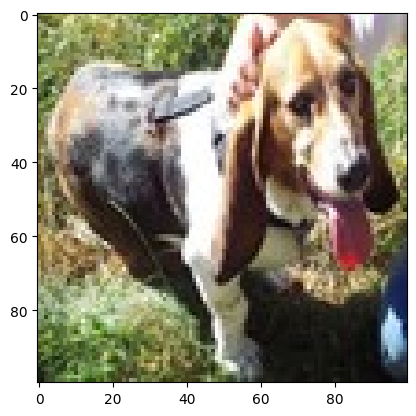

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model 1

In [6]:
model1 = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

C:\Users\srava\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
model1.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5273 - loss: 2.1879
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6029 - loss: 0.6537
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7260 - loss: 0.5793
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7949 - loss: 0.4721
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8400 - loss: 0.3942


In [9]:
model1.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7239 - loss: 0.5458


[0.5681499242782593, 0.7149999737739563]

Model2`

In [10]:
model2 = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [11]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model2.fit(X_train, Y_train, epochs=9, batch_size=64)


Epoch 1/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5293 - loss: 0.7193
Epoch 2/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5998 - loss: 0.6660
Epoch 3/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6765 - loss: 0.6158
Epoch 4/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7132 - loss: 0.5586
Epoch 5/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7695 - loss: 0.4972
Epoch 6/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8091 - loss: 0.4231
Epoch 7/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8257 - loss: 0.3864
Epoch 8/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8322 - loss: 0.3598
Epoch 9/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8865 - loss: 0.2893


In [12]:
model2.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7078 - loss: 0.6068


[0.6270049810409546, 0.6974999904632568]

Model3

In [13]:
model3 = Sequential([
    Conv2D(32, (6,6), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (6,6), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (6,6), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (6,6), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [14]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model3.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.4931 - loss: 0.6946
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5218 - loss: 0.6933
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.4974 - loss: 0.6944
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.4962 - loss: 0.6929
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.5346 - loss: 0.6923


In [15]:
model3.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5309 - loss: 0.6923


[0.6900343298912048, 0.5550000071525574]

Model4

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model4 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(1, activation='sigmoid')
])



In [17]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model4.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 322ms/step - accuracy: 0.4918 - loss: 0.7665
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step - accuracy: 0.5274 - loss: 0.6909
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.5333 - loss: 0.6884
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.4738 - loss: 0.7006
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.4983 - loss: 0.6926


In [18]:
model4.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.2206 - loss: 0.7036


[0.6891679167747498, 0.5074999928474426]

Model5

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    Dropout(0.5),
    
    Dense(1, activation='sigmoid')
])


C:\Users\srava\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model5.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.4934 - loss: 0.7028
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.5243 - loss: 0.6924
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.5872 - loss: 0.6787
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.6159 - loss: 0.6623
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.5976 - loss: 0.6698


In [21]:
model5.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5814 - loss: 0.6861


[0.6214374303817749, 0.6675000190734863]

Model6

In [22]:
from tensorflow.keras.layers import LeakyReLU

model6 = Sequential([
    Conv2D(32, (3, 3), input_shape=(100, 100, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dense(1, activation='sigmoid')
])


C:\Users\srava\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [23]:
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model6.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5156 - loss: 0.8185
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5235 - loss: 0.6888
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5802 - loss: 0.6714
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5901 - loss: 0.6667
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6691 - loss: 0.6106


In [25]:
model6.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7550 - loss: 0.5353


[0.6317360997200012, 0.6549999713897705]

In [26]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Model1 Performance:", model1.evaluate(X_test, Y_test))
print("Model2 Performance:", model2.evaluate(X_test, Y_test))
print("Model3 Performance:", model3.evaluate(X_test, Y_test))
print("Model4 Performance:", model4.evaluate(X_test, Y_test))
print("Model5 Performance:", model3.evaluate(X_test, Y_test))
print("Model6 Performance:", model4.evaluate(X_test, Y_test))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7239 - loss: 0.5458
Model1 Performance: [0.5681499242782593, 0.7149999737739563]
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7078 - loss: 0.6068
Model2 Performance: [0.6270049810409546, 0.6974999904632568]
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5309 - loss: 0.6923
Model3 Performance: [0.6900343298912048, 0.5550000071525574]
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.2206 - loss: 0.7036
Model4 Performance: [0.6891679167747498, 0.5074999928474426]
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5309 - loss: 0.6923
Model5 Performance: [0.6900343298912048, 0.5550000071525574]
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2206 - loss: 0.7036
Model6 Performance: [0.6891679167747498, 0.5074999928474426]


# Making predictions with the best performing model that is Model1

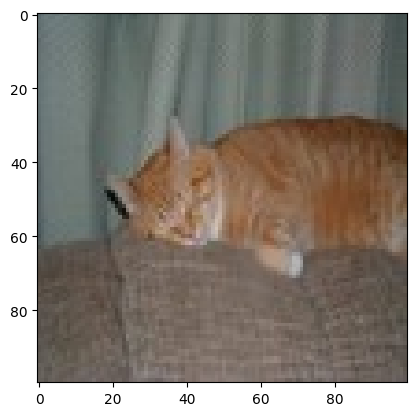

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Our model says it is a : cat


In [30]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model1.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

With Increasing the Dataset size I belive the model performence will increase.